In [6]:
import sys
import os

# 添加 factor_evaluation.pyd 所在的目录到系统路径
pyd_path = r"D:\MG\！internship\！4L CAPITAL\因子评估器"
sys.path.append(pyd_path)

# 导入模块
from factor_evaluation import FactorEvaluation
from factor_evaluation import DataService
import numpy as np
import pandas as pd

In [7]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [8]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

In [9]:
def calculate_obv(df):
    # 计算价格方向：上涨为1，下跌为-1，平盘为0
    price_direction = np.where(
        df['close'] > df['close'].shift(1), 1,
        np.where(df['close'] < df['close'].shift(1), -1, 0)
    )
    
    # 计算OBV：方向乘以成交量并累加
    obv = (price_direction * df['volume']).cumsum()
    
    # 直接返回OBV序列
    return obv

In [10]:
evaluator.set_factor(
    factor_data_or_func=calculate_obv,
    factor_name='calculate_obv'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
📈 平稳性检验 (ADF):
   p_value: 0.992582
   是否平稳: 否
🔗 相关性分析:
   IC (Pearson): -0.003936
   Rank_IC (Spearman): -0.010587
📊 信息比率:
   IR: 0.061323
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130267
   因子列: calculate_obv
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


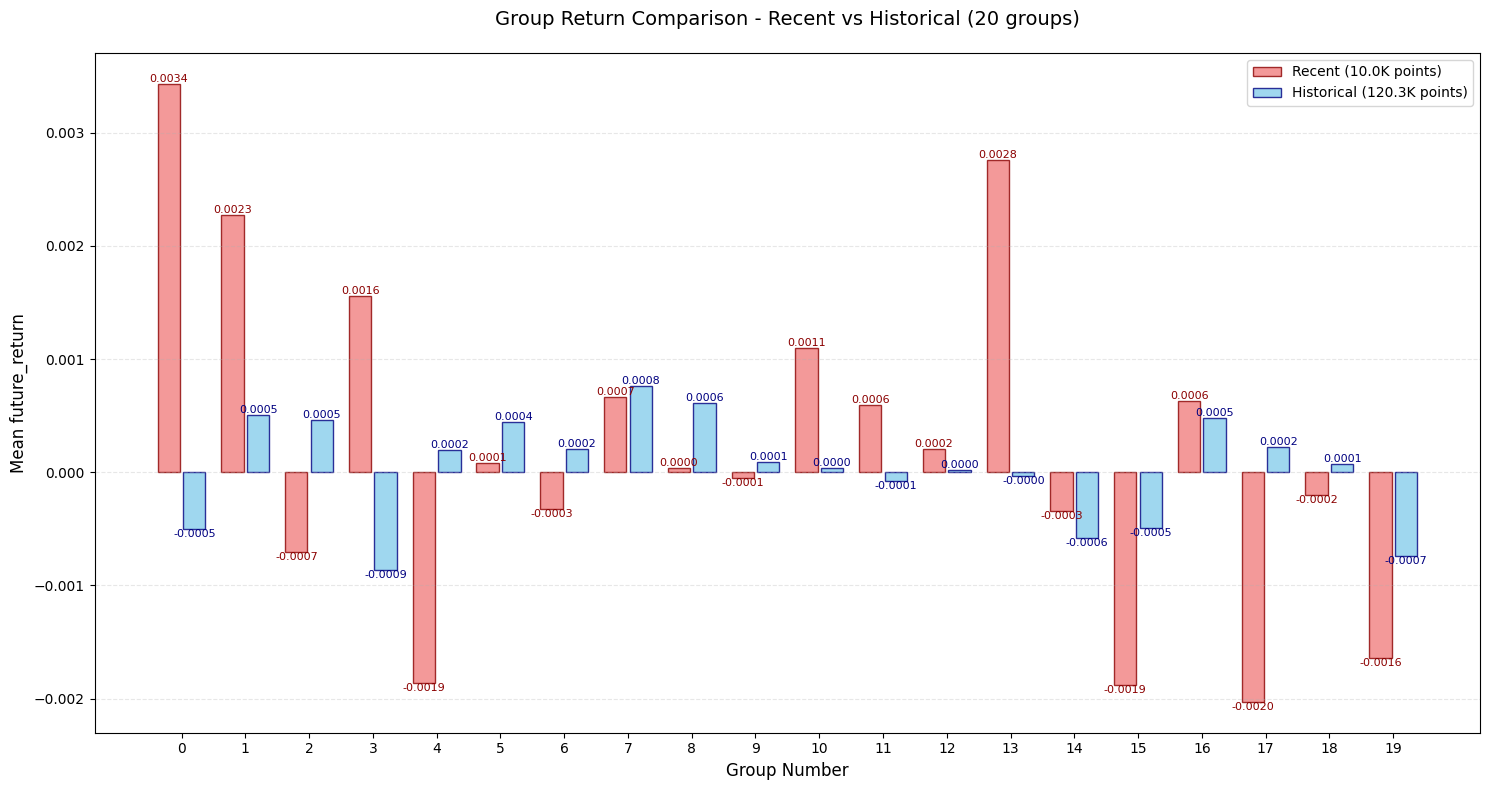

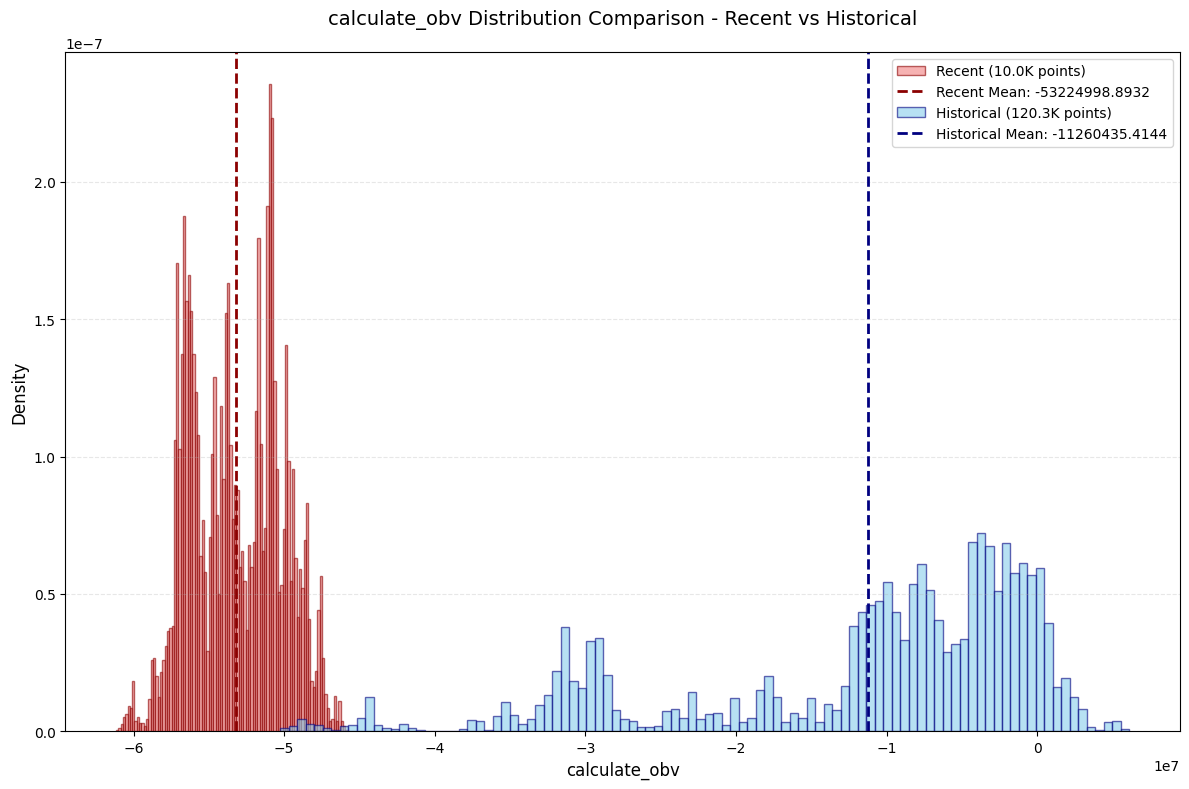

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [11]:
result=evaluator.run_full_evaluation(run_stationarity_test=True)